### Libraries needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Libraries needed for Machine learning Modeling

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Feature Engineering and Testing libraries

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix

In [4]:
df = pd.read_csv("cleaned_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


### Feature Engineering and Selecting, Train and Test Splitting

In [5]:
LE = LabelEncoder()
df = df.apply(LE.fit_transform)
df.head()

,Class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,0,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,0,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,0,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,0,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,0,0,1,0,0


In [6]:
# We took the variables that had non-negative correlatation with the target variable
df.corr()['Class'].sort_values(ascending=False).index

Index(['Class', 'gill_size', 'spore_print_color', 'bruises', 'population',
       'cap_shape', 'cap_surface', 'veil_color', 'gill_attachment',
       'cap_color', 'habitat', 'odor', 'stalk_shape',
       'stalk_surface_below_ring', 'ring_number', 'stalk_surface_above_ring',
       'stalk_color_below_ring', 'stalk_color_above_ring', 'gill_color',
       'stalk_root', 'gill_spacing', 'ring_type', 'veil_type'],
      dtype='object')

In [7]:
X = df[['gill_size', 'spore_print_color', 'bruises', 'population',
       'cap_shape', 'cap_surface', 'veil_color', 'gill_attachment',
       'cap_color']].to_numpy()
y = df["Class"].to_numpy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
print(f'Train size: {X_train.shape}\t{X_train.shape[0] / df.shape[0]}% \nTest size: {y_test.shape} \t{X_test.shape[0] / df.shape[0]}%')

Train size: (6093, 9)	0.75% 
Test size: (2031,) 	0.25%


### Modeling

In [10]:
dtree = DecisionTreeClassifier(max_depth=10)
rfc = RandomForestClassifier(n_estimators=120)
lr = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier()
NB = GaussianNB()
svc = SVC()
models_result = pd.DataFrame(columns = ['Model', 'Accuracy','Recall', 'Precision', 'F1'])

In [11]:
def save_metrics(model_name, y_test, y_pred):
    global models_result
    accuracy = "{:.3f}".format(accuracy_score(y_test, y_pred) * 100)
    recall = "{:.3f}".format(recall_score(y_test, y_pred) * 100)
    precision = "{:.3f}".format(precision_score(y_test, y_pred) * 100)
    f1 = "{:.3f}".format(f1_score(y_test, y_pred) * 100)
    models_result = models_result.append({'Model': model_name , 'Accuracy': str(accuracy) + '%', 'Recall': str(recall) + '%',
     'Precision': str(precision) + '%', 'F1': str(f1) + '%'}, ignore_index=True)

### Decision Tree Classifier

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [13]:
y_pred = dtree.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
save_metrics("Decision Tree Classifier", y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

[[1027   13]
 [   5  986]]


In [15]:
# from sklearn import tree

# feature_names = list(X.columns.astype(str))
# class_names = list(y.unique().astype(str))

# fig = plt.figure(figsize=(25,20))
# tree = tree.plot_tree(dtree, 
#                    feature_names=feature_names,  
#                    class_names=class_names,
#                    filled=True)

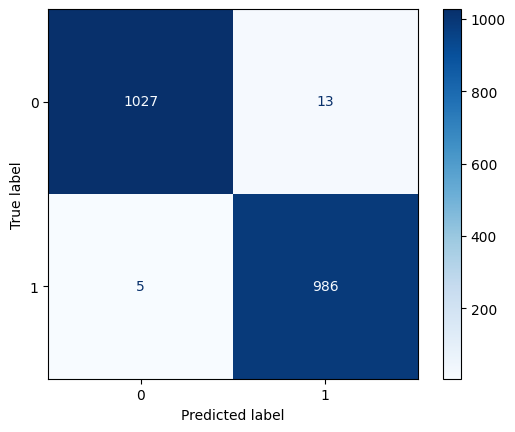

In [16]:
plot_confusion_matrix(dtree, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Random Forest Classifier

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [18]:
y_pred = rfc.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
save_metrics("Random Forest Classifier", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1040
           1       0.99      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

[[1029   11]
 [   7  984]]


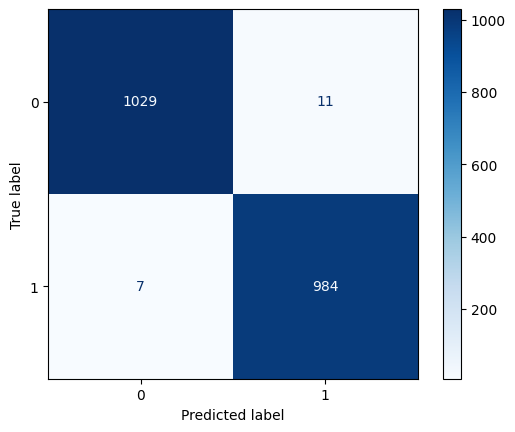

In [20]:
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Logistic Regression

In [21]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
save_metrics("Logistic Regression", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1040
           1       0.85      0.80      0.82       991

    accuracy                           0.83      2031
   macro avg       0.84      0.83      0.83      2031
weighted avg       0.83      0.83      0.83      2031

[[900 140]
 [197 794]]


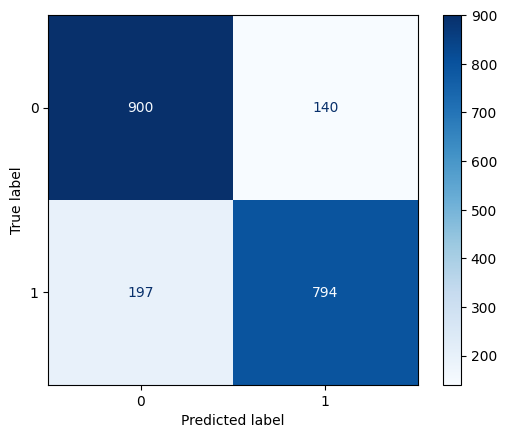

In [24]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### K-Nearest Neighbors Classifier

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
save_metrics("K-Nearest Neighbors Classifier", y_test, y_pred)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1040
           1       0.99      0.98      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

[[1030   10]
 [  17  974]]


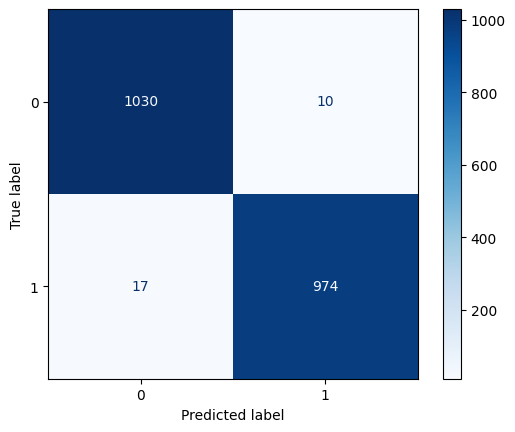

In [28]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Gaussian Naïve Bayes

In [29]:
NB.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = NB.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
save_metrics("Gaussian Naïve Bayes", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1040
           1       0.79      0.95      0.86       991

    accuracy                           0.85      2031
   macro avg       0.86      0.85      0.85      2031
weighted avg       0.87      0.85      0.85      2031

[[794 246]
 [ 54 937]]


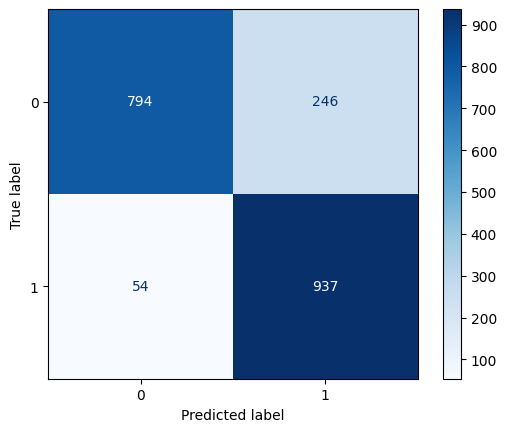

In [32]:
plot_confusion_matrix(NB, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Support Vector Classification

In [33]:
svc.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svc.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
save_metrics("Support Vector Classification", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1040
           1       0.94      0.99      0.97       991

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031

[[979  61]
 [  7 984]]


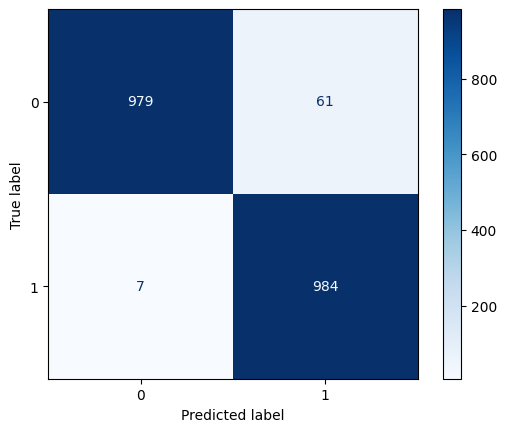

In [36]:
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [37]:
models_result.sort_values(by='Accuracy', ascending=False, ignore_index=True)

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree Classifier,99.114%,99.495%,98.699%,99.095%
1,Random Forest Classifier,99.114%,99.294%,98.894%,99.094%
2,K-Nearest Neighbors Classifier,98.671%,98.285%,98.984%,98.633%
3,Support Vector Classification,96.652%,99.294%,94.163%,96.660%
4,Gaussian Naïve Bayes,85.229%,94.551%,79.205%,86.201%
5,Logistic Regression,83.407%,80.121%,85.011%,82.494%


In [38]:
lst = ['Accuracy', 'Recall', 'Precision', 'F1']
for i in lst:
    models_result[i] = models_result[i].str.replace('%', '').astype(float)

In [39]:
# for i, j in zip(range(0,4), range(1,5)):
#     plt.subplot(2,2,j)
#     m_fig = px.bar(models_result, x=lst[i], y='Model')
    # print(i,j)
m_fig = px.bar(models_result, x=lst, y='Model', barmode='group')
#models = ['Decision Tree Classifier', 'Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors Classifier', 'Gaussian Naive Bayes', 'Support Vector Classification']
# fig, axes = plt.subplot(2,3,1)
# m_fig = sns.barplot(models_result, x=models[0], y=lst)

# plt.subplot(2,3,2)
# m_fig = sns.barplot(models_result, x="Accuracy", y='Model')

# plt.subplot(2,3,3)
# m_fig = sns.barplot(models_result, x=lst[2], y='Model')

# plt.subplot(2,3,4)
# m_fig = sns.barplot(models_result, x=lst[3], y='Model')

# plt.subplot(2,3,5)
# m_fig = sns.barplot(models_result, x=lst[3], y='Model')

# plt.subplot(2,3,6)
# m_fig = sns.barplot(models_result, x=lst[3], y='Model')

m_fig.show()

In [40]:
models = models_result['Model'].unique()
models

array(['Decision Tree Classifier', 'Random Forest Classifier',
       'Logistic Regression', 'K-Nearest Neighbors Classifier',
       'Gaussian Naïve Bayes', 'Support Vector Classification'],
      dtype=object)

### Conclusions

In this notebook, we trained 6 diffierent machine learning models which are Decision Tree Classifier, Random forest Classifier, Logistic Regression, K-Nearest Neighbors Classifier, Gaussian Naive Bayes and finally Support Vector Classification. 

The results appears that Random forest tree, decision tree, and Knn got the highest rating overall in this problem. All these algorithms do well with non-linear problems, perhaps maybe that's the reason?.

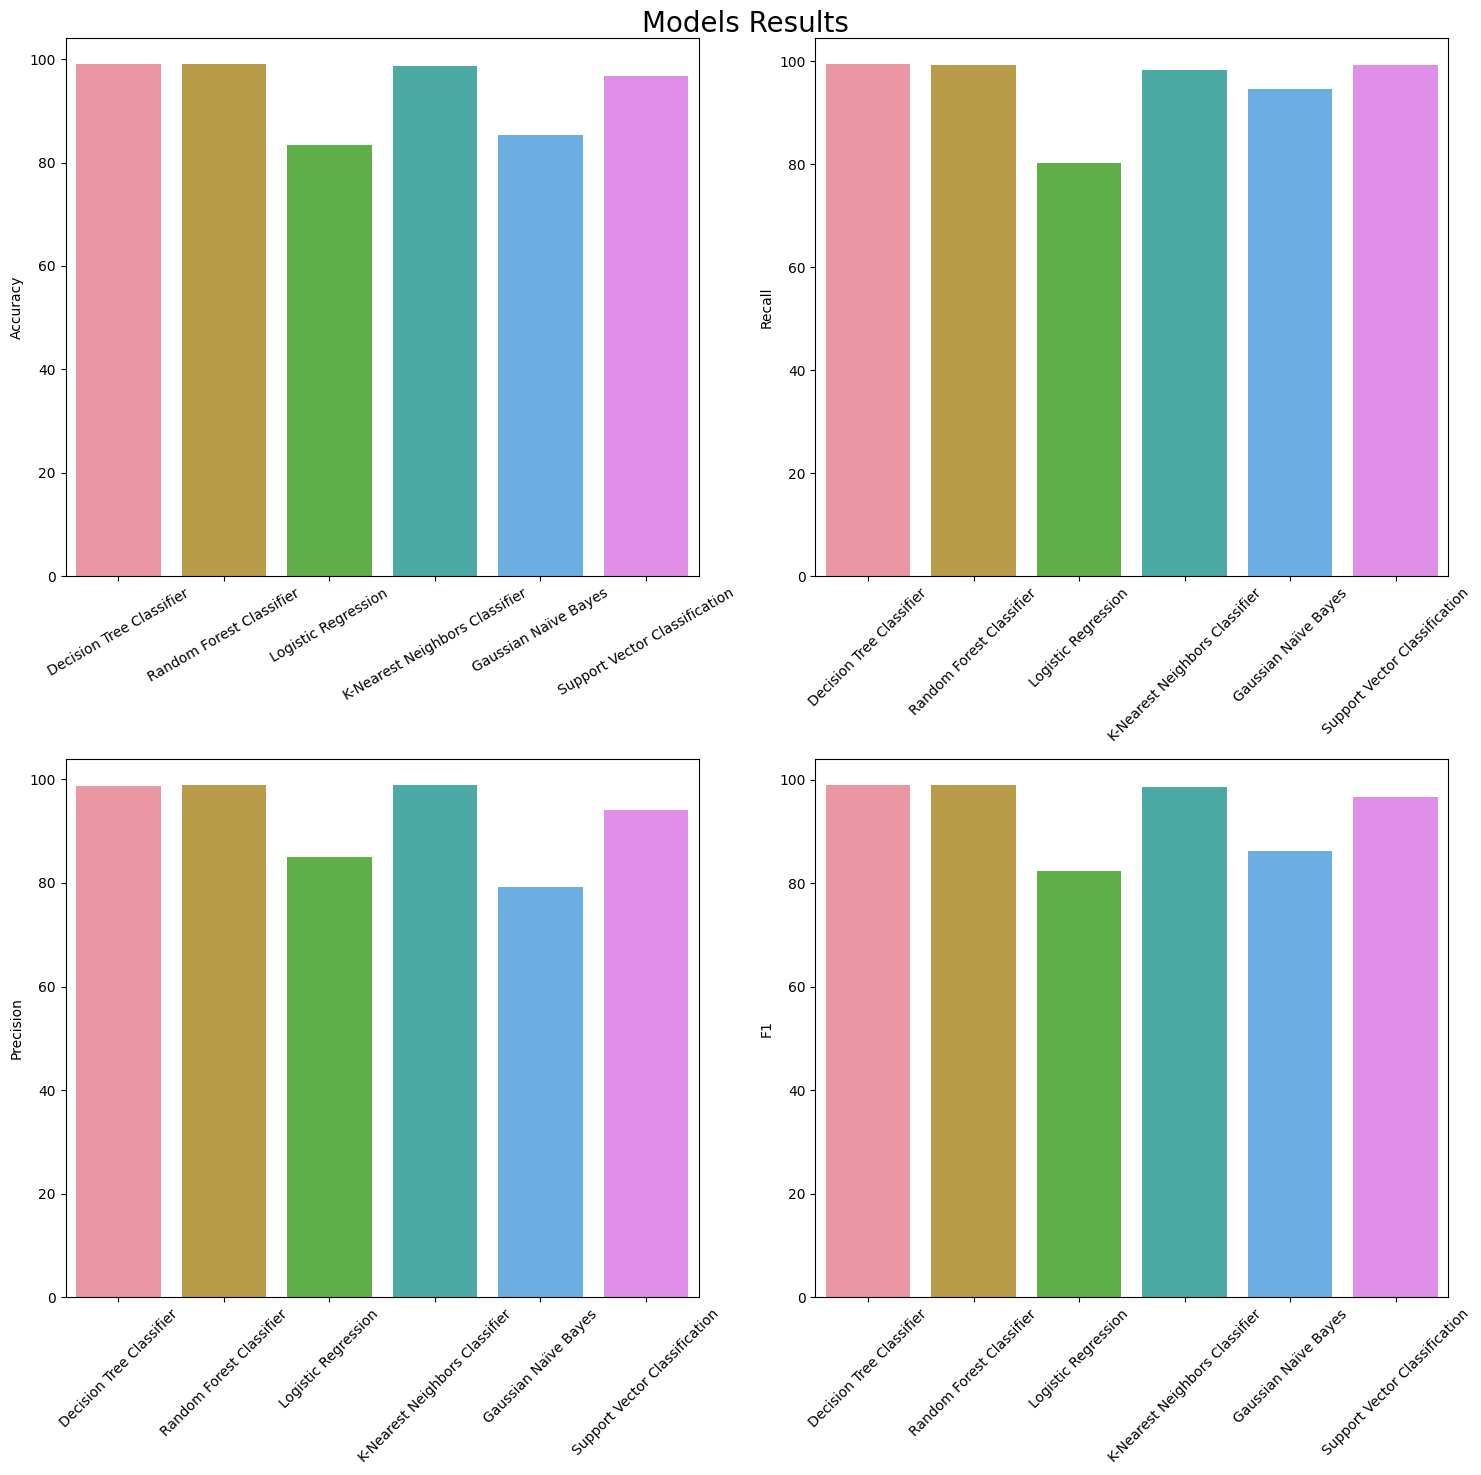

In [41]:
fig, axes = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Models Results', fontsize=20)
sns.set_palette(['red','forestgreen'])
sns.barplot(ax=axes[0][0], data=models_result, y=lst[0], x='Model')
sns.barplot(ax=axes[0][1], data=models_result, y=lst[1], x='Model')
sns.barplot(ax=axes[1][0], data=models_result, y=lst[2], x='Model')
sns.barplot(ax=axes[1][1], data=models_result, y=lst[3], x='Model')


axes[0][0].set_xticklabels(labels=models, rotation=30)
axes[0][0].set_xlabel('')


axes[0][1].set_xticklabels(labels=models, rotation=45)
axes[0][1].set_xlabel('')


axes[1][0].set_xticklabels(labels=models, rotation=45)
axes[1][0].set_xlabel('')

axes[1][1].set_xticklabels(labels=models, rotation=45)
axes[1][1].set_xlabel('')
fig.tight_layout()
fig.show()